# Universidade de Fortaleza
Mestrado em Ciência de Dados e Inteligência Artificial

Professor: Daniel Macedo

Aluno: Marcus Miranda

### Desafio
1) Fazer o Sprit da Imagem do Mega Men

### Bibliotecas Utilizadas

In [20]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

### Apresentando a Imagem do MegaMen

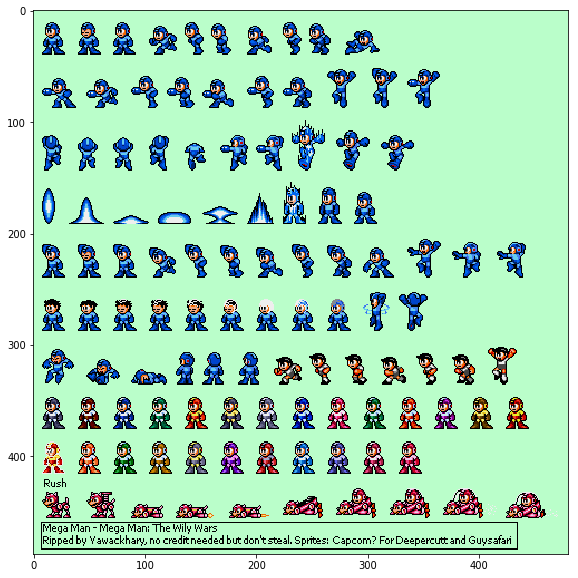

In [21]:
img = cv2.cvtColor(cv2.imread("mega.png"), cv2.COLOR_BGR2RGB)
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(img)

### Usando OpenCv

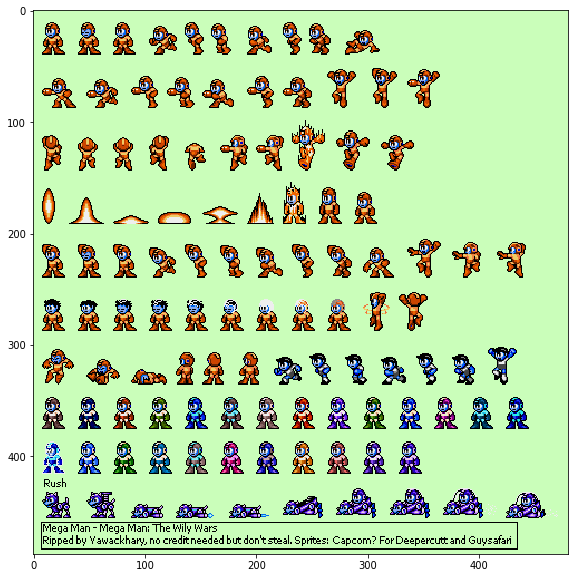

In [22]:
# Carregando a Imagem
image = cv2.imread('mega.png')
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(image)

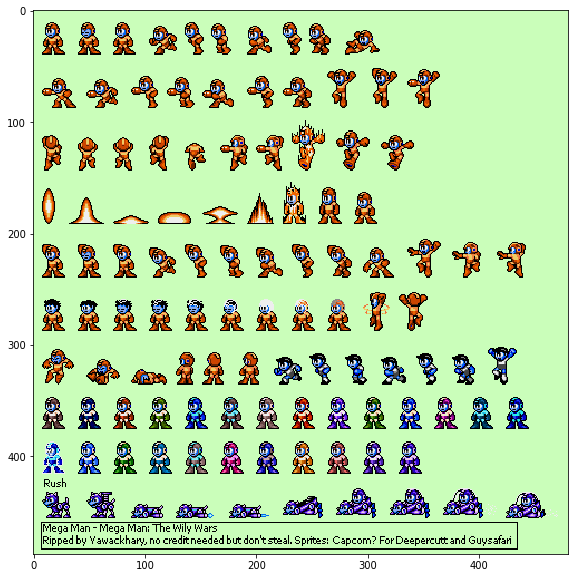

In [23]:
# Criando uma cópia
original = image.copy()
image = cv2.imread('mega.png')
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(original)

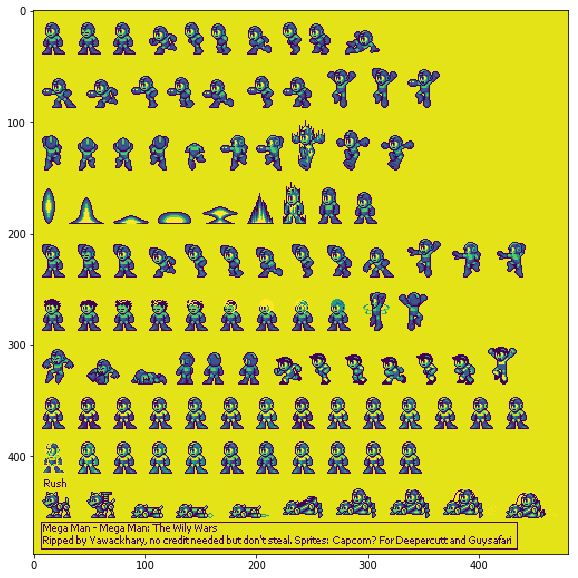

In [24]:
# Convertendo na escala de BR2GRAY
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(gray)

### Threshold
Nosso objetivo é separar as regiões de uma imagem correspondentes aos objetos que queremos analisar. Essa separação é baseada na variação de intensidade entre os pixels do objeto e os pixels do fundo.

Para diferenciar os pixels de nosso interesse dos demais (que eventualmente serão rejeitados), fazemos uma comparação de cada valor de intensidade de pixel em relação a um limite (determinado de acordo com o problema a ser resolvido).

Depois de separar adequadamente os pixels importantes, podemos defini-los com um determinado valor para identificá-los (ou seja, podemos atribuir-lhes um valor de 0 (Preto), 255 (branco) ou qualquer valor que se adapte às suas necessidades).


### THRESH_BINARY_INV : 
Caso invertido ou oposto do cv2 . THRESH_BINARY. cv. THRESH_TRUNC: Se o valor da intensidade do pixel for maior que o limite, ele será truncado para o limite. Os valores de pixel são definidos para serem iguais ao limite.

### THRESH_OTSU
A função threshold () é usada, mas passa um sinalizador extra, cv2 . THRESH_OTSU . Para o valor limite, simplesmente passe zero. Em seguida, o algoritmo encontra o valor limite ideal e retorna você como a segunda saída, retVal. Se o limite de Otsu não for usado, retVal é igual ao valor de limite usado.

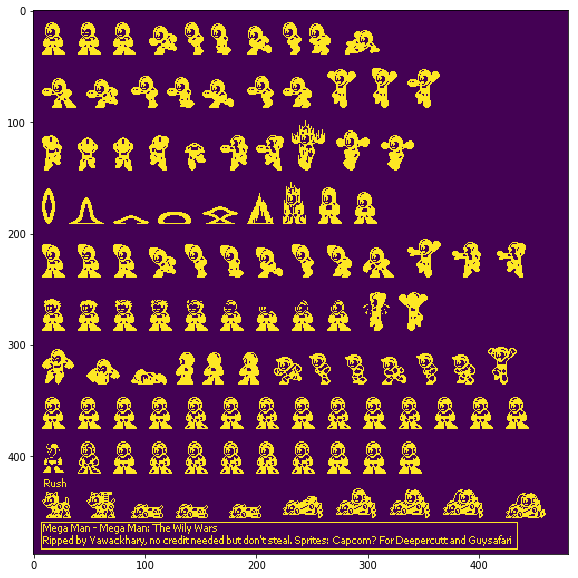

In [25]:
# Aqui usaremos o threshold, 
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU)[1]
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(thresh)

In [26]:
### Método GetStructuringElement (MorphShapes, Size) 
##Retorna um elemento de estruturação do tamanho e forma especificados para operações
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

As transformações morfológicas são algumas operações simples baseadas na forma da imagem. Normalmente é executado em imagens binárias. Ele precisa de duas entradas, uma é nossa imagem original, a segunda é chamada de elemento estruturante ou kernel que decide a natureza da operação. Dois operadores morfológicos básicos são Erosão e Dilatação. Em seguida, suas formas variantes como abertura, fechamento, gradiente etc. também entram em jogo. 

Em nosso caso abaixo precisamos fazer o fechamento, que é o reverso da abertura, dilatação seguida por erosão . É útil para fechar pequenos orifícios dentro dos objetos em primeiro plano ou pequenos pontos pretos no objeto.

In [27]:
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

### Dilatação
É exatamente o oposto da erosão. Aqui, um elemento de pixel é '1' se pelo menos um pixel sob o kernel for '1'. Portanto, aumenta a região branca na imagem ou o tamanho do objeto em primeiro plano aumenta. Normalmente, em casos como remoção de ruído, a erosão é seguida de dilatação. Porque a erosão remove os ruídos brancos, mas também encolhe nosso objeto. Então, nós dilatamos. Como o ruído acabou, eles não voltarão, mas nossa área de objeto aumenta. Também é útil para unir partes quebradas de um objeto.

In [28]:
dilate = cv2.dilate(close, kernel, iterations=1)

### FindContours

Os contornos podem ser explicados simplesmente como uma curva que une todos os pontos contínuos (ao longo da fronteira), tendo a mesma cor ou intensidade. Os contornos são uma ferramenta útil para análise de formas e detecção e reconhecimento de objetos.

Para melhor precisão, use imagens binárias. Portanto, antes de encontrar contornos, aplique a detecção de limite ou de borda astuta.
A função findContours modifica a imagem de origem. Portanto, se você quiser a imagem de origem mesmo após encontrar os contornos, já armazene-a em algumas outras variáveis.
No OpenCV, encontrar contornos é como encontrar um objeto branco em um fundo preto. Portanto, lembre-se de que o objeto a ser encontrado deve ser branco e o fundo preto.

### RETR_EXTERNAL

Se você usar este sinalizador, ele retornará apenas sinalizadores externos extremos. Todos os contornos filhos são deixados para trás. Podemos dizer, segundo esta lei, apenas o mais velho em cada família é cuidado. 

### CHAIN_APPROX_SIMPLE

Se você passar CHAIN_APPROX_NONE, todos os pontos de limite serão armazenados. Mas realmente precisamos de todos os pontos? Por exemplo, você encontrou o contorno de uma linha reta. Você precisa de todos os pontos da linha para representá-la? Não, precisamos de apenas dois pontos finais dessa linha. Isso é o que cv2.CHAIN_APPROX_SIMPLE faz. Ele remove todos os pontos redundantes e comprime o contorno, economizando memória.

In [29]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [30]:
# matriz de contornos
cnts

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), [array([[[ 25, 419]],
  
         [[ 25, 421]],
  
         [[ 24, 422]],
  
         [[ 16, 422]],
  
         [[ 14, 420]],
  
         [[  9, 420]],
  
         [[  9, 428]],
  
         [[ 10, 428]],
  
         [[ 11, 429]],
  
         [[ 11, 434]],
  
         [[ 10, 435]],
  
         [[ 10, 437]],
  
         [[  9, 438]],
  
         [[  8, 438]],
  
         [[  7, 439]],
  
         [[  7, 441]],
  
         [[  8, 442]],
  
         [[  8, 443]],
  
         [[ 12, 447]],
  
         [[ 14, 447]],
  
         [[ 15, 448]],
  
         [[ 15, 450]],
  
         [[ 14, 451]],
  
         [[ 13, 451]],
  
         [[ 11, 453]],
  
         [[ 11, 457]],
  
         [[ 10, 458]],
  
         [[  6, 458]],
  
         [[  6, 484]],
  
         [[435, 484]]

In [31]:
#Tratamento dos contornos
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

In [15]:
cnts

[array([[[ 25, 419]],
 
        [[ 25, 421]],
 
        [[ 24, 422]],
 
        [[ 16, 422]],
 
        [[ 14, 420]],
 
        [[  9, 420]],
 
        [[  9, 428]],
 
        [[ 10, 428]],
 
        [[ 11, 429]],
 
        [[ 11, 434]],
 
        [[ 10, 435]],
 
        [[ 10, 437]],
 
        [[  9, 438]],
 
        [[  8, 438]],
 
        [[  7, 439]],
 
        [[  7, 441]],
 
        [[  8, 442]],
 
        [[  8, 443]],
 
        [[ 12, 447]],
 
        [[ 14, 447]],
 
        [[ 15, 448]],
 
        [[ 15, 450]],
 
        [[ 14, 451]],
 
        [[ 13, 451]],
 
        [[ 11, 453]],
 
        [[ 11, 457]],
 
        [[ 10, 458]],
 
        [[  6, 458]],
 
        [[  6, 484]],
 
        [[435, 484]],
 
        [[435, 457]],
 
        [[436, 456]],
 
        [[439, 456]],
 
        [[440, 455]],
 
        [[442, 455]],
 
        [[443, 456]],
 
        [[457, 456]],
 
        [[460, 453]],
 
        [[460, 450]],
 
        [[459, 449]],
 
        [[459, 447]],
 
        [[457, 4

In [16]:
#Inicializando uma variavel para ser o contador
sprite_number = 0

### boundingRect

A função boundingRect () de OpenCV é usada para desenhar um retângulo aproximado ao redor da imagem binária. Esta função é usada principalmente para destacar a região de interesse após a obtenção dos contornos de uma imagem

### imwrite

O método imwrite () é usado para salvar uma imagem em qualquer dispositivo de armazenamento. Isso salvará a imagem de acordo com o formato especificado no diretório de trabalho atual. ... O nome do arquivo deve incluir formato de imagem 

### rectangle

O método rectangle () é usado para desenhar um retângulo em qualquer imagem. ... start_point: São as coordenadas iniciais do retângulo . As coordenadas são representadas como tuplas de dois valores, isto é (valor da coordenada X, valor da coordenada Y).

-1

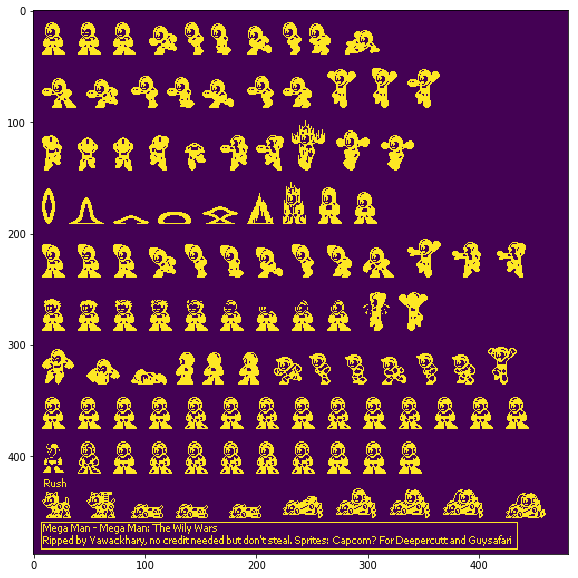

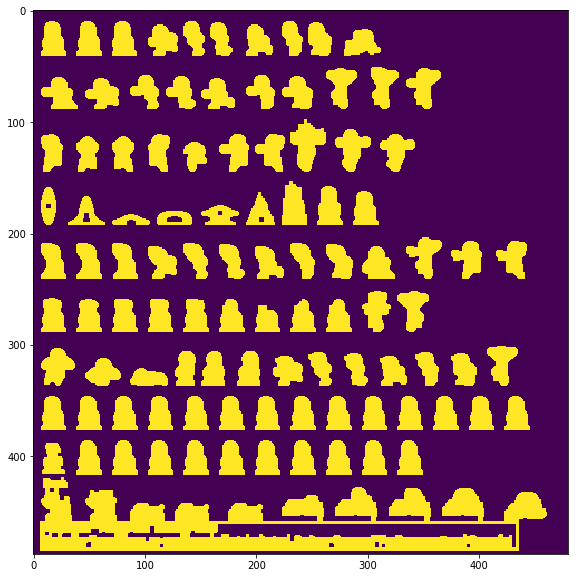

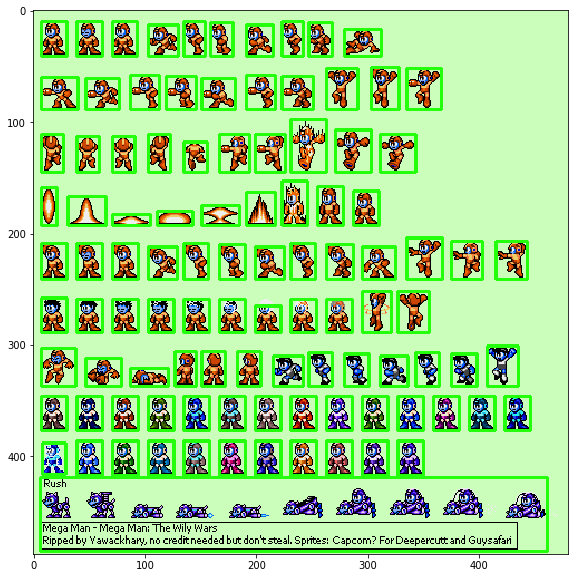

In [19]:
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = image[y:y+h, x:x+w]
    cv2.imwrite('sprite_{}.png'.format(sprite_number), ROI)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    sprite_number += 1

_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(thresh)
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(dilate)
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(image)
    
# cv2.imshow('thresh', thresh)
# cv2.imshow('dilate', dilate)
# cv2.imshow('image', image)
cv2.waitKey()

### O Objetivo e fazer o recorte das imagens menores, conforme abaixo:

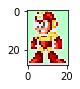

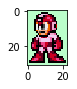

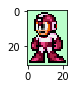

In [18]:
img = cv2.cvtColor(cv2.imread("sprite_1.png"), cv2.COLOR_BGR2RGB)
_, ax1 = plt.subplots(figsize=(2,1))
ax1.imshow(img)

img = cv2.cvtColor(cv2.imread("sprite_2.png"), cv2.COLOR_BGR2RGB)
_, ax1 = plt.subplots(figsize=(2,1))
ax1.imshow(img)

img = cv2.cvtColor(cv2.imread("sprite_3.png"), cv2.COLOR_BGR2RGB)
_, ax1 = plt.subplots(figsize=(2,1))
ax1.imshow(img)